# **Practica Alumnos Importando BD**

## **Desafio 1**

In [70]:
import pandas as pd
url = 'https://gist.githubusercontent.com/ahcamachod/807a2c1cf6c19108b2b701ea1791ab45/raw/fb84f8b2d8917a89de26679eccdbc8f9c1d2e933/alumnos.csv'
df = pd.read_csv(url)

In [71]:
df.head(7)

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,NaN,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,NaN,False
6,Daniela,21,7.0,True


In [72]:
df.tail(5)

,Nombre,Edad,Nota,Aprobado
13,Miriam,25,9.0,True
14,Pablo,37,NaN,False
15,Milena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,Verdadero


In [73]:
df.shape

(18, 4)

In [74]:
df.columns

Index(['Nombre', 'Edad', 'Nota', 'Aprobado'], dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nombre    18 non-null     object 
 1   Edad      18 non-null     int64  
 2   Nota      12 non-null     float64
 3   Aprobado  18 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 708.0+ bytes


In [76]:
df.describe()

,Edad,Nota
count,18.000000,12.000000
mean,25.500000,6.841667
std,6.070662,2.264532
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


# **Inmuebles Analisis exploratorio
**

## **Desafio 2**

In [77]:
link = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'
datos = pd.read_csv(link, sep=';')
datos

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
...,...,...,...,...,...,...,...,...,...
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN


In [78]:
inmueble = ['Departamento']

In [79]:
datos_departamento = datos.query('@inmueble in Tipo')
datos_departamento

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [80]:
datos_promedio = datos_departamento.groupby(['Tipo'])['Habitaciones'].mean()
datos_promedio

,Habitaciones
Tipo,
Departamento,2.504199


In [81]:
cantidad_colonias = len(datos.Colonia.unique())
cantidad_colonias

88

In [82]:
datos_altos = datos.groupby(['Colonia'])['Valor'].mean().sort_values(ascending=False)
datos_altos

,Valor
Colonia,
San Juan Xalpa,420926.739130
Nativitas,244684.395062
La Merced,213292.770833
Santa Marta Acatitla,166048.105263
Villa de Cortés,135737.411765
...,...
Álvaro Obregón,3048.281250
San José Insurgentes,2660.000000
El Rodeo,2586.111111


<Axes: xlabel='Colonia', ylabel='Promedio Alquiler'>

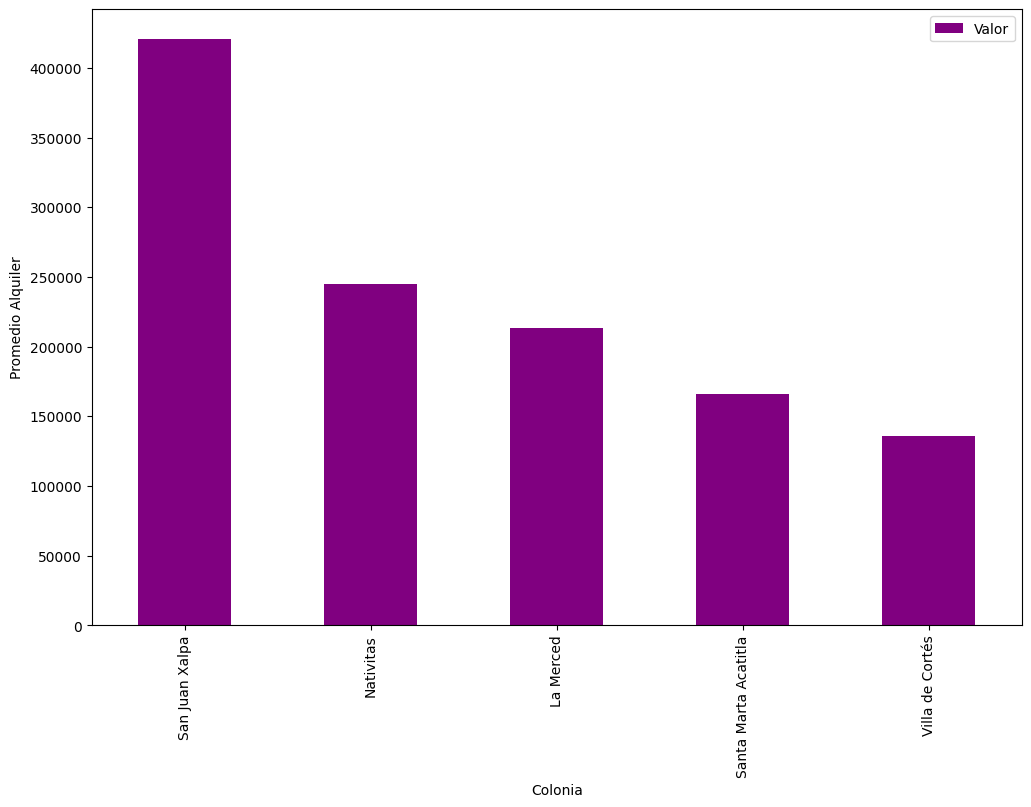

In [83]:
grafica = datos_altos.head(5).to_frame()
grafica.plot(kind='bar', figsize=(12,8),color='purple',xlabel='Colonia',ylabel='Promedio Alquiler')

#Alumnos Datos Nulos

## **Tratamiento y filtrado de datos**

In [84]:
df.isnull().sum()

,0
Nombre,0
Edad,0
Nota,6
Aprobado,0


In [85]:
df

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,NaN,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,NaN,False
6,Daniela,21,7.0,True
7,Carlos,19,6.0,False
8,Alicia,35,5.6,False
9,Victor,28,NaN,False


In [86]:
df = df.fillna(5)

In [87]:
df.query("Nombre == 'Carlos' | Nombre == 'Alicia' ")

,Nombre,Edad,Nota,Aprobado
7,Carlos,19,6.0,False
8,Alicia,35,5.6,False


In [88]:
#remover_dato = df.query("Nombre == 'Carlos' | Nombre == 'Alicia' ").index

In [89]:
#df.drop(remover_dato,axis=0,inplace= True)

In [90]:
df

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,5.0,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,5.0,False
6,Daniela,21,7.0,True
7,Carlos,19,6.0,False
8,Alicia,35,5.6,False
9,Victor,28,5.0,False


In [91]:
df

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,5.0,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,5.0,False
6,Daniela,21,7.0,True
7,Carlos,19,6.0,False
8,Alicia,35,5.6,False
9,Victor,28,5.0,False


In [92]:
Aprobados = df['Aprobado']== 'True'

In [93]:
df[Aprobados]

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
4,Brian,21,10.0,True
6,Daniela,21,7.0,True
12,Stephany,26,10.0,True
13,Miriam,25,9.0,True
15,Milena,29,7.0,True


In [94]:
df_aprobados = df[Aprobados]

In [95]:
df_aprobados

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
4,Brian,21,10.0,True
6,Daniela,21,7.0,True
12,Stephany,26,10.0,True
13,Miriam,25,9.0,True
15,Milena,29,7.0,True


In [96]:
df_aprobados.to_csv('/content/drive/MyDrive/Colab Notebooks/Alumnos_aprobados.csv',index=False )

In [97]:
df['Puntos_Extra'] = df['Nota'].apply(lambda x:4 * x /10)
df

,Nombre,Edad,Nota,Aprobado,Puntos_Extra
0,Alberto,20,7.5,True,3.00
1,Ana,18,5.0,False,2.00
2,Camila,27,2.5,False,1.00
3,David,18,5.0,False,2.00
4,Brian,21,10.0,True,4.00
5,Bruna,23,5.0,False,2.00
6,Daniela,21,7.0,True,2.80
7,Carlos,19,6.0,False,2.40
8,Alicia,35,5.6,False,2.24
9,Victor,28,5.0,False,2.00


In [98]:
df['Notas_Finales'] = df['Nota'] + df['Puntos_Extra']
df

,Nombre,Edad,Nota,Aprobado,Puntos_Extra,Notas_Finales
0,Alberto,20,7.5,True,3.00,10.50
1,Ana,18,5.0,False,2.00,7.00
2,Camila,27,2.5,False,1.00,3.50
3,David,18,5.0,False,2.00,7.00
4,Brian,21,10.0,True,4.00,14.00
5,Bruna,23,5.0,False,2.00,7.00
6,Daniela,21,7.0,True,2.80,9.80
7,Carlos,19,6.0,False,2.40,8.40
8,Alicia,35,5.6,False,2.24,7.84
9,Victor,28,5.0,False,2.00,7.00


In [99]:
df['Aprobado_Final'] = df['Notas_Finales'].apply(lambda x: 'True' if x >=7 else 'False')
df

,Nombre,Edad,Nota,Aprobado,Puntos_Extra,Notas_Finales,Aprobado_Final
0,Alberto,20,7.5,True,3.00,10.50,True
1,Ana,18,5.0,False,2.00,7.00,True
2,Camila,27,2.5,False,1.00,3.50,False
3,David,18,5.0,False,2.00,7.00,True
4,Brian,21,10.0,True,4.00,14.00,True
5,Bruna,23,5.0,False,2.00,7.00,True
6,Daniela,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,False,2.40,8.40,True
8,Alicia,35,5.6,False,2.24,7.84,True
9,Victor,28,5.0,False,2.00,7.00,True


In [110]:
seleccion = (df['Aprobado'] == 'False') & (df['Aprobado_Final'] == 'True')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nombre          18 non-null     object 
 1   Edad            18 non-null     int64  
 2   Nota            18 non-null     float64
 3   Aprobado        18 non-null     object 
 4   Puntos_Extra    18 non-null     float64
 5   Notas_Finales   18 non-null     float64
 6   Aprobado_Final  18 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ KB


In [111]:
df_filtrado = df[seleccion]
print(df_filtrado)

    Nombre  Edad  Nota Aprobado  Puntos_Extra  Notas_Finales Aprobado_Final
1      Ana    18   5.0    False          2.00           7.00           True
3    David    18   5.0    False          2.00           7.00           True
5    Bruna    23   5.0    False          2.00           7.00           True
7   Carlos    19   6.0    False          2.40           8.40           True
8   Alicia    35   5.6    False          2.24           7.84           True
9   Victor    28   5.0    False          2.00           7.00           True
10  Danilo    21   5.0    False          2.00           7.00           True
14   Pablo    37   5.0    False          2.00           7.00           True
16   Lucas    33   5.0    False          2.00           7.00           True
